In [17]:
import re
import pandas as pd
import requests

from bs4 import BeautifulSoup
from pathlib import Path
from config_local import DATA_DIR
from content_parsing import get_text_v3


In [18]:
test_url = "https://www.aljazeera.com/news/2024/3/6/trumps-talk-on-gaza-highlights-stark-choice-for-voters-in-us-election"
page = requests.get(test_url)

soup = BeautifulSoup(page.content, "html.parser")

# save fiel
with open("parsed_page.html", "w", encoding="utf-8") as file:
    file.write(soup.prettify())

# print(soup.find("header", class_="article-header").find("h1"))
main_content = soup.find("main", id="main-content-area")

with open("parsed_main_content.html", "w", encoding="utf-8") as file:
    file.write(main_content.prettify())


print(main_content.text)


News|Israel War on GazaTrump’s Gaza comments highlight tough choice for peace-supporting US votersFormer president’s rhetoric shows voters seeking to punish Joe Biden for backing Israel face dilemma in upcoming election.Republican presidential frontrunner Donald Trump speaks at a Super Tuesday election night party, on March 5, 2024, at Mar-a-Lago in Palm Beach, Florida. [Rebecca Blackwell/AP Photo]Published On 6 Mar 20246 Mar 2024Donald Trump has voiced explicit backing for Israel’s war on Gaza, suggesting that he supports the goal expressed by the hardline government in Tel Aviv of continuing the assault until “total victory”.
Asked if he is “on board” with the way Israel was “taking the fight to Gaza”, the frontrunner for the Republican US presidential nomination responded: “You’ve got to finish the problem”. With Trump set to race incumbent Joe Biden, his words suggest that voters opposed to United States support of Israel’s war will face a dilemma in November’s presidential electio

In [19]:
for s in soup.find("main"):
    
    is_content = False
    # skip non-class objects
    if not s.get("class"):
        continue

    
    # search for "all-content" object
    for c in s["class"]:
        if re.search("all-content", c):
            is_content = True

    if is_content:
        text = []
        for p in s.find_all("p"):
            text.append(p.text)

    

print(text)


['Donald Trump has voiced explicit backing for Israel’s war on Gaza, suggesting that he supports the goal expressed by the hardline government in Tel Aviv of continuing the assault until “total victory”.', 'Asked if he is “on board” with the way Israel was “taking the fight to Gaza”, the frontrunner for the Republican US presidential nomination responded: “You’ve got to finish the problem”. With Trump set to race incumbent Joe Biden, his words suggest that voters opposed to United States support of Israel’s war will face a dilemma in November’s presidential election.', 'The interview with Fox News where Trump made the comments took place as his path to the presidential nomination was all but cleared on Super Tuesday. Shortly after being soundly beaten in most primaries across the country, his only serious challenger, Nikki Haley, was expected to quit.', 'Trump’s statement also came as Biden‘s support appears to be wobbling. While the president won almost all the Democratic nominating c

In [32]:
aljazeera_urls = pd.read_csv(Path(DATA_DIR, "mc_aljazeera_01082022_10032024.csv"))
aljazeera_urls.head()


,archived_url,article_url,id,language,media_name,media_url,publish_date,title,url,indexed_date,date_time
0,https://web.archive.org/web/20221010214845/htt...,https://wayback-api.archive.org/colsearch/v1/m...,20221010214845,en,aljazeera.com,http://aljazeera.com,2022-10-10 00:00:00,Musk praised by Chinese diplomat over controve...,https://www.aljazeera.com/economy/2022/10/10/m...,NaN,2022-10-10
1,https://web.archive.org/web/20221011065555/htt...,https://wayback-api.archive.org/colsearch/v1/m...,20221011065555,en,aljazeera.com,http://aljazeera.com,2022-10-10 00:00:00,Singtel unit faces cyberattack weeks after Opt...,https://www.aljazeera.com/economy/2022/10/10/s...,NaN,2022-10-10
2,https://web.archive.org/web/20221011074457/htt...,https://wayback-api.archive.org/colsearch/v1/m...,20221011074457,en,aljazeera.com,http://aljazeera.com,2022-10-10 00:00:00,UAE president to meet Russia’s Vladimir Putin ...,https://www.aljazeera.com/economy/2022/10/10/u...,NaN,2022-10-10
3,https://web.archive.org/web/20221012062930/htt...,https://wayback-api.archive.org/colsearch/v1/m...,20221012062930,en,aljazeera.com,http://aljazeera.com,2022-10-11 00:00:00,Australia to avoid recession amid ‘dangerous’ ...,https://www.aljazeera.com/economy/2022/10/11/a...,NaN,2022-10-11
4,https://web.archive.org/web/20221012064231/htt...,https://wayback-api.archive.org/colsearch/v1/m...,20221012064231,en,aljazeera.com,http://aljazeera.com,2022-10-11 00:00:00,Biden labour proposal could shake up gig economy,https://www.aljazeera.com/economy/2022/10/11/b...,NaN,2022-10-11


In [31]:
for row in aljazeera_urls.head(10).itertuples():
    page = requests.get(row.url)
    article = BeautifulSoup(page.content, "html.parser")
    content = get_text_v3(article)

    print(row.url)
    print(len(content.split()))
    print()


https://www.aljazeera.com/economy/2022/10/10/musk-praised-by-chinese-diplomat-over-controversial-taiwan-plan
338

https://www.aljazeera.com/economy/2022/10/10/singtel-unit-faces-cyber-attack-weeks-after-optus-data-breach
140

https://www.aljazeera.com/economy/2022/10/10/uae-president-to-meet-russias-vladimir-putin-on-tuesday
485

https://www.aljazeera.com/economy/2022/10/11/australia-to-avoid-recession-amid-dangerous-outlook-govt-says
230

https://www.aljazeera.com/economy/2022/10/11/biden-labour-proposal-to-shake-up-gig-economy
562

https://www.aljazeera.com/economy/2022/10/11/hong-kong-leader-says-no-legal-basis-to-seize-russian-megayacht
347

https://www.aljazeera.com/economy/2022/10/11/hyundai-kia-parts-supplier-in-alabama-fined-for-child-labor
340

https://www.aljazeera.com/economy/2022/10/11/imf-cuts-2023-global-outlook-amid-colliding-global-shocks
703

https://www.aljazeera.com/economy/2022/10/11/south-korea-improving-on-inequality-hong-kong-slipping-oxfam
426

https://www.aljaz

In [43]:
aljazeera_full_text = pd.DataFrame({
    "id": [], "retrieval_date": [], "full_text": [], "word_count": [],
})

In [45]:
aljazeera_full_text.loc[aljazeera_full_text["id"]==1]

,id,retrieval_date,full_text,word_count


In [44]:
aljazeera_full_text[1] = 

,retrieval_date,full_text,word_count
id,,,


In [57]:
from datetime import datetime

datetime.now().__str__()

'2024-03-21 15:42:48.518575'

In [183]:
import pandas as pd
from csv import writer

# Sample DataFrame
data = {'A': [], 'B': []}
data_1 = {'A': [0, 1, 2], 'B': [3, 4, 5]}
df = pd.DataFrame(data)
df_1 = pd.DataFrame(data_1)

with open('output.csv', 'a') as f:
    df.to_csv(f, header=f.tell()==0, index=False) 

# Iterate over the DataFrame
for index, row in df_1.iterrows():
    # Process each row here
    
    # For demonstration, let's just print the row
    print(row)
    
    # Write the current row to a CSV file
    with open('output.csv', 'a') as f:
        writer_object = writer(f)

        writer_object.writerow(row)

A    0
B    3
Name: 0, dtype: int64
A    1
B    4
Name: 1, dtype: int64
A    2
B    5
Name: 2, dtype: int64


In [184]:
row.to_list()

[2, 5]

In [256]:
aljazeera_urls.head()

,archived_url,article_url,id,language,media_name,media_url,publish_date,title,url,indexed_date,date_time
0,https://web.archive.org/web/20221010214845/htt...,https://wayback-api.archive.org/colsearch/v1/m...,20221010214845,en,aljazeera.com,http://aljazeera.com,2022-10-10 00:00:00,Musk praised by Chinese diplomat over controve...,https://www.aljazeera.com/economy/2022/10/10/m...,NaN,2022-10-10
1,https://web.archive.org/web/20221011065555/htt...,https://wayback-api.archive.org/colsearch/v1/m...,20221011065555,en,aljazeera.com,http://aljazeera.com,2022-10-10 00:00:00,Singtel unit faces cyberattack weeks after Opt...,https://www.aljazeera.com/economy/2022/10/10/s...,NaN,2022-10-10
2,https://web.archive.org/web/20221011074457/htt...,https://wayback-api.archive.org/colsearch/v1/m...,20221011074457,en,aljazeera.com,http://aljazeera.com,2022-10-10 00:00:00,UAE president to meet Russia’s Vladimir Putin ...,https://www.aljazeera.com/economy/2022/10/10/u...,NaN,2022-10-10
3,https://web.archive.org/web/20221012062930/htt...,https://wayback-api.archive.org/colsearch/v1/m...,20221012062930,en,aljazeera.com,http://aljazeera.com,2022-10-11 00:00:00,Australia to avoid recession amid ‘dangerous’ ...,https://www.aljazeera.com/economy/2022/10/11/a...,NaN,2022-10-11
4,https://web.archive.org/web/20221012064231/htt...,https://wayback-api.archive.org/colsearch/v1/m...,20221012064231,en,aljazeera.com,http://aljazeera.com,2022-10-11 00:00:00,Biden labour proposal could shake up gig economy,https://www.aljazeera.com/economy/2022/10/11/b...,NaN,2022-10-11


In [263]:
df.id

0      20221010214845
1      20221011065555
2      20221011074457
3      20221012062930
4      20221012064231
            ...      
311    20221209074048
312    20221209072544
313    20221209072642
314    20221210063140
315    20221209074156
Name: id, Length: 316, dtype: int64

In [265]:
df = pd.read_csv("output.csv")
df.id = df.id.astype(str)

In [267]:
df

,id,url,title,retrieval_time,full_text,word_count
0,20221010214845,https://www.aljazeera.com/economy/2022/10/10/m...,Musk praised by Chinese diplomat over controve...,2024-03-21 16:08:22.474740,"“Taiwan sells many products, but our freedom a...",338
1,20221011065555,https://www.aljazeera.com/economy/2022/10/10/s...,Singtel unit faces cyberattack weeks after Opt...,2024-03-21 16:08:22.522040,"Singtel said on Monday the attack on Dialog, a...",140
2,20221011074457,https://www.aljazeera.com/economy/2022/10/10/u...,UAE president to meet Russia’s Vladimir Putin ...,2024-03-21 16:08:22.590116,United Arab Emirates President Sheikh Mohammed...,485
3,20221012062930,https://www.aljazeera.com/economy/2022/10/11/a...,Australia to avoid recession amid ‘dangerous’ ...,2024-03-21 16:08:22.672653,Australia should be able to avoid a recession ...,230
4,20221012064231,https://www.aljazeera.com/economy/2022/10/11/b...,Biden labour proposal could shake up gig economy,2024-03-21 16:08:22.724284,"Gig company stocks were hammered on the news, ...",562
...,...,...,...,...,...,...
311,20221209074048,https://www.aljazeera.com/economy/2022/12/8/us...,US extends export bans on three firms over ill...,2024-03-21 17:10:33.365447,The US Department of Commerce will continue to...,411
312,20221209072544,https://www.aljazeera.com/economy/2022/12/8/us...,US labour market still tight as unemployment h...,2024-03-21 17:10:33.940171,Though the weekly jobless claims report from t...,755
313,20221209072642,https://www.aljazeera.com/economy/2022/12/8/us...,US sues to block Microsoft buying ‘Call of Dut...,2024-03-21 17:10:34.036740,The United States trade regulator has filed a ...,575
314,20221210063140,https://www.aljazeera.com/economy/2022/12/9/fo...,Former CEO of failed FTX says he’s willing to ...,2024-03-21 17:10:36.719722,NaN,0


In [271]:
df2 = pd.merge(df, aljazeera_urls.loc[:, ["id", "publish_date"]], how="left", on="id")
df2["date_time"] = pd.to_datetime(df2.publish_date)


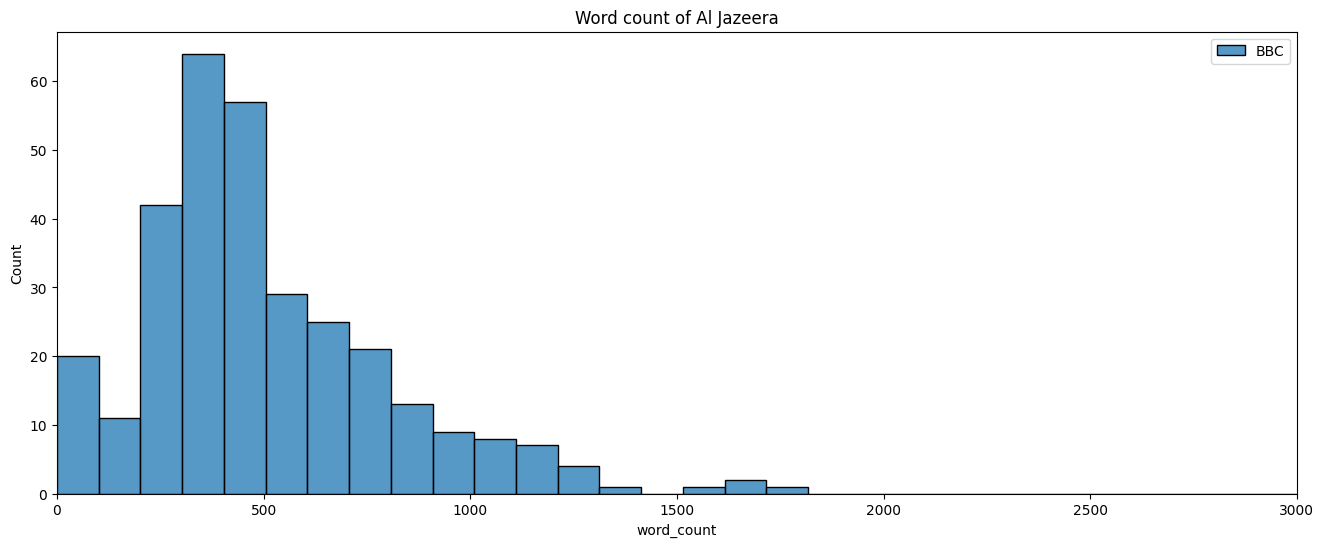

In [272]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 6))

sns.histplot(df, x="word_count", label="BBC")
ax.set_xlim((0, 3000))
plt.title("Word count of Al Jazeera")
plt.legend()
plt.show()

In [ ]:
aljazeera_urls

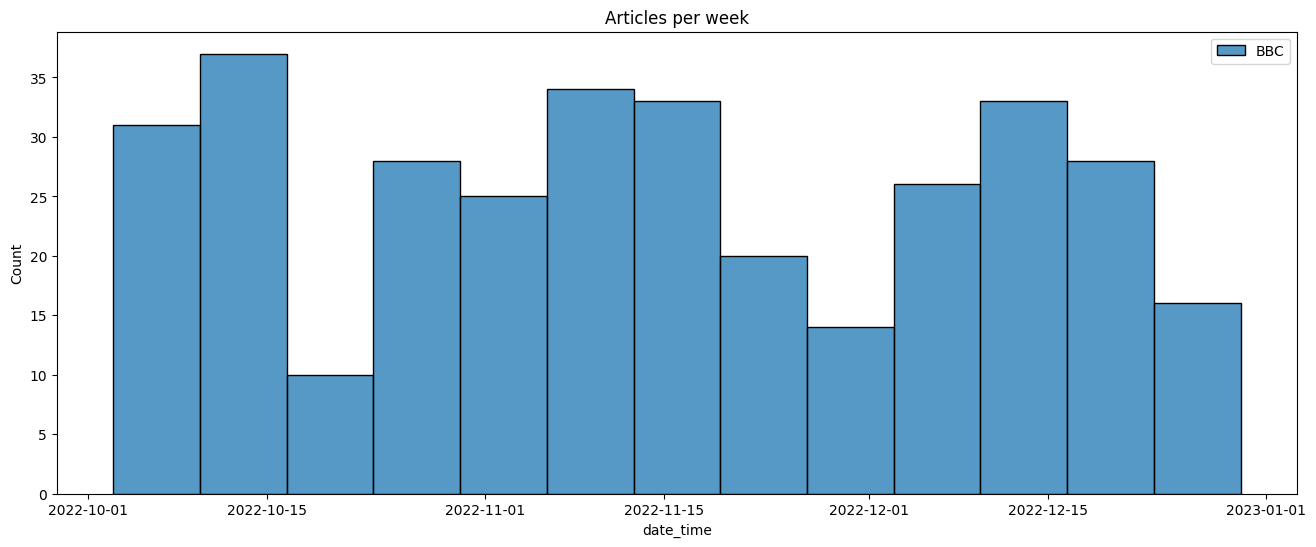

In [273]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.histplot(df2, x="date_time", label="BBC", binwidth=7)
plt.title("Articles per week")
plt.legend()
plt.show()

In [248]:
df.tail(6)

,id,url,title,retrieval_time,full_text,word_count
210,20221114214140,https://www.aljazeera.com/economy/2022/11/9/bi...,Binance deal for FTX collapses | Business and ...,2024-03-21 17:04:59.313381,Binance signed a non-binding agreement on Tues...,423
211,20221114214140,https://www.aljazeera.com/economy/2022/11/9/bi...,Binance deal for FTX collapses | Business and ...,2024-03-21 17:07:20.050246,Binance signed a non-binding agreement on Tues...,423
212,20221114210727,https://www.aljazeera.com/economy/2022/11/9/cr...,Cryptocurrencies see sharp decline as investor...,2024-03-21 17:07:20.724773,Cryptocurrencies saw a second day of sharp dec...,746
213,20221114201909,https://www.aljazeera.com/economy/2022/11/9/cy...,Cyber-extortionist leaks Australians’ medical ...,2024-03-21 17:07:21.643098,A cyber-extortionist has leaked details of Aus...,403
214,20221114211632,https://www.aljazeera.com/economy/2022/11/9/mu...,Musk tells Twitter advertisers he wants to sto...,2024-03-21 17:07:22.254126,Elon Musk has told advertisers he aims to turn...,635
215,20221114210310,https://www.aljazeera.com/economy/2022/11/9/te...,Tesla stock hits two-year low after boss Musk ...,2024-03-21 17:07:22.879577,Tesla Inc shares have sunk to their lowest lev...,508


In [249]:
from csv import writer

In [251]:
aljazeera_urls.loc[aljazeera_urls.id=="20221114210310"]

,archived_url,article_url,id,language,media_name,media_url,publish_date,title,url,indexed_date,date_time
204,https://web.archive.org/web/20221114210310/htt...,https://wayback-api.archive.org/colsearch/v1/m...,20221114210310,en,aljazeera.com,http://aljazeera.com,2022-11-09 00:00:00,Tesla stock hits two-year low after boss Musk ...,https://www.aljazeera.com/economy/2022/11/9/te...,NaN,2022-11-09


In [237]:
aljazeera_urls.iloc[196:]

,archived_url,article_url,id,language,media_name,media_url,publish_date,title,url,indexed_date,date_time
196,https://web.archive.org/web/20221114193238/htt...,https://wayback-api.archive.org/colsearch/v1/m...,20221114193238,en,aljazeera.com,http://aljazeera.com,2022-11-08 00:00:00,Is Musk’s Twitter ready for a surge in US midt...,https://www.aljazeera.com/economy/2022/11/8/is...,NaN,2022-11-08
197,https://web.archive.org/web/20221114194833/htt...,https://wayback-api.archive.org/colsearch/v1/m...,20221114194833,en,aljazeera.com,http://aljazeera.com,2022-11-08 00:00:00,Sportswear rivalry deepens as Puma chief named...,https://www.aljazeera.com/economy/2022/11/8/pu...,NaN,2022-11-08
198,https://web.archive.org/web/20221108083743/htt...,https://wayback-api.archive.org/colsearch/v1/m...,20221108083743,en,aljazeera.com,http://aljazeera.com,2022-11-08 00:00:00,"‘Strong impression’ Putin will skip G20, Indon...",https://www.aljazeera.com/economy/2022/11/8/st...,NaN,2022-11-08
199,https://web.archive.org/web/20221114204345/htt...,https://wayback-api.archive.org/colsearch/v1/m...,20221114204345,en,aljazeera.com,http://aljazeera.com,2022-11-09 00:00:00,Australian PM says ‘positive thing’ to meet Ch...,https://www.aljazeera.com/economy/2022/11/9/au...,NaN,2022-11-09
200,https://web.archive.org/web/20221114214140/htt...,https://wayback-api.archive.org/colsearch/v1/m...,20221114214140,en,aljazeera.com,http://aljazeera.com,2022-11-09 00:00:00,Binance deal for FTX collapses | Business and ...,https://www.aljazeera.com/economy/2022/11/9/bi...,NaN,2022-11-09
...,...,...,...,...,...,...,...,...,...,...,...
24501,NaN,NaN,0c5a883ab89c70c7b2827394c746204edb06673b00a29e...,en,aljazeera.com,aljazeera.com,2023-01-01,"Photos: Fireworks, confetti and dancing as wor...",https://www.aljazeera.com/gallery/2023/1/1/pho...,2024-03-10 20:31:39.262919,2023-01-01
24502,NaN,NaN,a09f72926638bfb5c54220bcaa030c1e44d7e1cb1ec7fe...,en,aljazeera.com,aljazeera.com,2023-01-01,"World welcomes 2023, leaving a stormy year behind",https://www.aljazeera.com/news/2023/1/1/world-...,2024-03-10 20:38:51.533765,2023-01-01
24503,NaN,NaN,c7726f04c9f4ba65038dfb42442ac56fe33071e96c85a4...,en,aljazeera.com,aljazeera.com,2023-01-01,Stampede during New Year fireworks kills at le...,https://www.aljazeera.com/news/2023/1/1/stampe...,2024-03-10 20:38:51.288999,2023-01-01
24504,NaN,NaN,85f483ad6cead0d1bef03b23808063739ee7eb1b98f1f7...,en,aljazeera.com,aljazeera.com,2023-01-01,EU calls on Rwanda to stop supporting M23 rebe...,https://www.aljazeera.com/news/2023/1/1/eu-cal...,2024-03-10 20:38:51.758446,2023-01-01
